In [2]:
# import required modules
import os.path
from osgeo import gdal
from gdalconst import *
import numpy as np

In [3]:
block_size = 5000
redband_num = 1
greenband_num = 2
blueband_num = 3
NRI = 4

inputRaster_path = 'C:/Users/Avinash/Downloads/VI ortho/small.tif'
outputRaster_path = 'C:/Users/Avinash/Downloads/VI ortho/VI_small.tif'

In [4]:
# read input rows, cols, and bands of raster
ds = gdal.Open(inputRaster_path, gdal.GA_ReadOnly)
if ds is None:
    print ("Open failed.\n")
ysize = ds.RasterYSize
xsize = ds.RasterXSize
nbands = ds.RasterCount

In [5]:
nbands

4

In [6]:
# read as raster 
redband_raster = ds.GetRasterBand(redband_num)
greenband_raster = ds.GetRasterBand(greenband_num)
blueband_raster = ds.GetRasterBand(blueband_num)
NRI_raster = ds.GetRasterBand(NRI)

In [7]:
# output parameters
format = "GTiff"  
driver = gdal.GetDriverByName(format)
dst_ds = driver.Create(outputRaster_path, xsize, ysize, 1, gdal.GDT_Float32)  
dst_ds.SetGeoTransform(ds.GetGeoTransform())  
dst_ds.SetProjection(ds.GetProjection()) 

0

# VARI

In [8]:
# process image in a manners of block by block
xrange = range
for i in xrange(0, ysize, block_size):

    # prevent moving window from being larger than row size of input raster
    rows = block_size if i + block_size < ysize else ysize - i
            
    # read col      
    for j in xrange(0, xsize, block_size):

        # prevent moving window from being larger than col size of input raster
        cols = block_size if j + block_size < xsize else xsize - j

        # extract block out of the whole raster
        red_array = redband_raster.ReadAsArray(j, i, cols, rows) 
        green_array = greenband_raster.ReadAsArray(j, i, cols, rows)
        blue_array = blueband_raster.ReadAsArray(j, i, cols, rows)
        NRI_array=blueband_raster.ReadAsArray(j, i, cols, rows)

        # avoid zero situation
        red_array = red_array+0.00001

        # calculate VNDVI
        vndvi_array = (green_array - red_array)/(red_array + green_array - blue_array)

        # write ndvi array into output .tiff file
        dst_ds.GetRasterBand(1).WriteArray(vndvi_array, j, i) 
    print('Okay, go for it')
                
# program ends
dst_ds = None

Okay, go for it


In [9]:
NRI_array

array([[208, 212, 208, ...,  33,  37,  57],
       [206, 211, 209, ...,  38,  43,  54],
       [209, 212, 209, ...,  40,  43,  44],
       ...,
       [ 88,  95,  92, ..., 148, 158, 168],
       [ 82,  98,  87, ..., 143, 143, 151],
       [102, 100, 102, ..., 150, 141, 140]], dtype=uint8)

In [11]:
import rasterio

In [12]:
from matplotlib import pyplot as plt

In [13]:
data_dir = 'C:/Users/Avinash/Downloads/VI ortho'

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1034, 'height': 870, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False, 'interleave': 'band'}


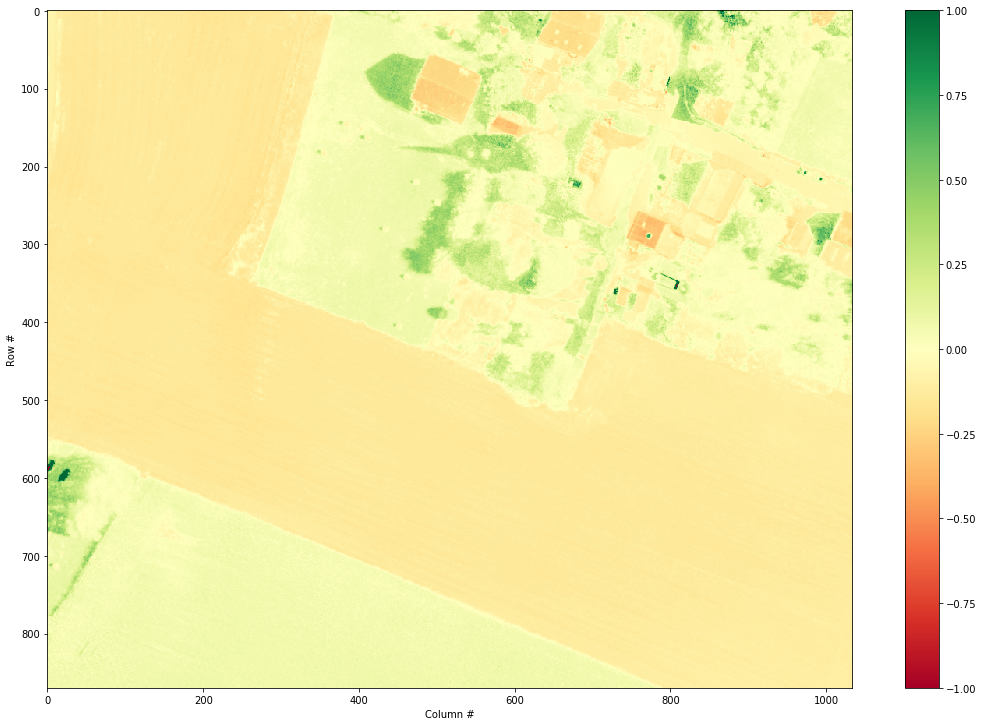

In [14]:
# Reopen the file and plot
with rasterio.open('C:/Users/Avinash/Downloads/VI ortho/VI_small.tif') as src:
    print(src.profile)
    ndvi = src.read(1) # read the entire array
plt.figure(figsize=(15,10))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1,interpolation='nearest')
plt.colorbar()
plt.tight_layout()
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.savefig("C:/Users/Avinash/Downloads/VI ortho/out.png")

# Analysing each band of raster image 

In [118]:
data_dir = 'C:/Users/Avinash/Downloads/VI ortho'

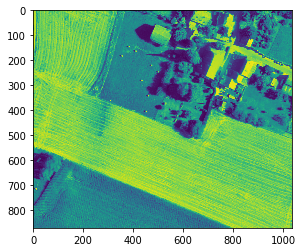

In [157]:
import rasterio
from rasterio.plot import show
import numpy as np
import os
%matplotlib inline

# Data dir

# Filepath
fp = os.path.join(data_dir, "small.tif")

# Open the file:
raster = rasterio.open(fp)

# Plot band 1
show((raster, 1))

In [136]:
nbands = ds.RasterCount

In [137]:
nbands

4

Text(0.5, 1.0, 'NRI')

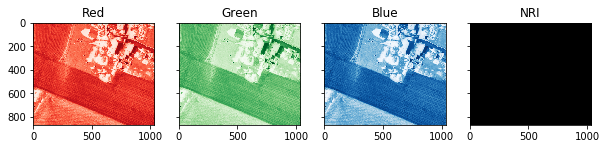

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize subplots
fig, (ax1, ax2, ax3,ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
show((raster, 2), cmap='Reds', ax=ax1)
show((raster, 3), cmap='Greens', ax=ax2)
show((raster, 1), cmap='Blues', ax=ax3)
show((raster, 4), cmap='Greys_r', ax=ax4)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")
ax4.set_title("NRI")


# NDVI

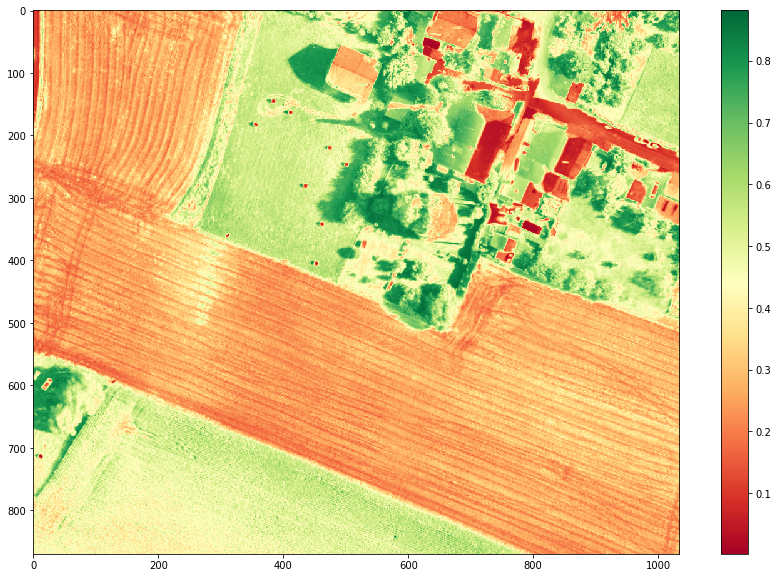

In [217]:
from osgeo import gdal
import numpy

g = gdal.Open ("C:/Users/Avinash/Downloads/VI ortho/small.tif")

b3 = g.GetRasterBand(3).ReadAsArray().astype(np.float32)
b4 = g.GetRasterBand(4).ReadAsArray().astype(np.float32)

ndvi = (b4 - b3)/(b4 + b3)

plt.figure(figsize=(15,10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.show()


# Ratio

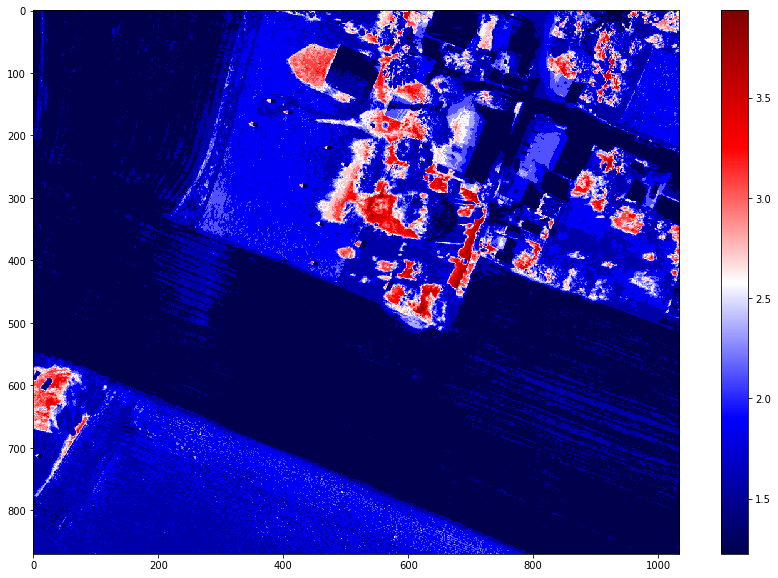

In [218]:
from osgeo import gdal
import numpy

g = gdal.Open ("C:/Users/Avinash/Downloads/VI ortho/small.tif")

b3 = g.GetRasterBand(3).ReadAsArray().astype(np.float32)
b4 = g.GetRasterBand(4).ReadAsArray().astype(np.float32)

ndvi = (b4  //b3)
TVI=np.sqrt(ndvi+.5)
plt.figure(figsize=(15,10))
plt.imshow(TVI, cmap='seismic')
plt.colorbar()
plt.show()

# Transformed Vegetation Index(TVI)

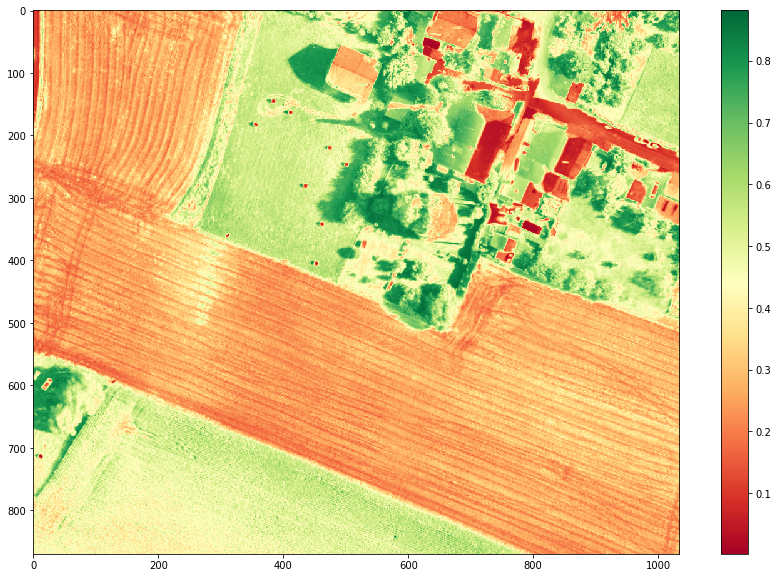

In [219]:
from osgeo import gdal
import numpy

g = gdal.Open ("C:/Users/Avinash/Downloads/VI ortho/small.tif")

b3 = g.GetRasterBand(3).ReadAsArray().astype(np.float32)
b4 = g.GetRasterBand(4).ReadAsArray().astype(np.float32)

ndvi = (b4 - b3)/(b4 + b3)
TVI=np.sqrt(ndvi+.5)
plt.figure(figsize=(15,10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.show()
